# Modern Olympics Data Visualizations & Analysis Part 2

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
from wordcloud import WordCloud
from pylab import *
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

## Topic 2.1: Home-field Advantage
### <font color="darkred">*Main goal: To visualize whether the Olympics host country has advanatage*</font>

In [44]:
data = pd.read_csv('athlete_events.csv')
summer= data[data.Season=='Summer']
summer.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
138741,69695,Staffan Lidbeck,M,24.0,180.0,75.0,Sweden,SWE,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",NaN
35102,18085,Anne Capron,F,19.0,166.0,54.0,France,FRA,1988 Summer,1988,Summer,Seoul,Synchronized Swimming,Synchronized Swimming Women's Solo,NaN
30887,15906,Paul David Brydon,M,20.0,173.0,NaN,New Zealand,NZL,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Road Race, Individual",NaN
159826,80191,Praphalsai Minpraphal,F,18.0,164.0,57.0,Thailand,THA,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Women's 200 metres Butterfly,NaN
129942,65417,Yevgeniya Petrovna Kuznetsova,F,15.0,143.0,36.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,NaN


In [45]:
host_countries = pd.read_csv("host_countries.csv",skipinitialspace=True)

In [46]:
#Find unique year
unique_NOC = summer.NOC.unique()
unique_Year = summer.Year.unique()
unique_Year.sort()
unique_NOC.sort()
unique_Year

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [47]:
#Create medal summary list
Year_list=[]
NOC_list=[]
MedalPercentage_list=[]
for year in unique_Year:
    for noc in unique_NOC:
        total_medals = summer[(summer["Year"]==year)]
        medals_gained = total_medals[(total_medals["Medal"].notnull()) & (total_medals["NOC"] == noc)]
        medals_percentage = len(medals_gained)/len(total_medals)
        Year_list.append(year)
        NOC_list.append(noc)
        MedalPercentage_list.append(medals_percentage)

In [48]:
#Make panda dataframe with the medal summary list
MedalSummary_list = list(zip(Year_list, NOC_list,MedalPercentage_list)) 
MedalSummary = pd.DataFrame(MedalSummary_list, columns = ['Year', 'NOC','Percentage_of_Medals'])  
MedalSummary['compressed']=MedalSummary.apply(lambda x:'%s%s' % (x['Year'],x['NOC']),axis=1)
host_countries['compressed']=host_countries.apply(lambda x:'%s%s' % (x['Year'],x['NOC']),axis=1)
MedalSummary['Host_Country'] = MedalSummary['compressed'].isin(host_countries['compressed']).astype(int)
MedalSummary.drop(columns=["compressed"])
MedalSummary

,Year,NOC,Percentage_of_Medals,compressed,Host_Country
0,1896,AFG,0.0,1896AFG,0
1,1896,AHO,0.0,1896AHO,0
2,1896,ALB,0.0,1896ALB,0
3,1896,ALG,0.0,1896ALG,0
4,1896,AND,0.0,1896AND,0
...,...,...,...,...,...
6665,2016,YEM,0.0,2016YEM,0
6666,2016,YMD,0.0,2016YMD,0
6667,2016,YUG,0.0,2016YUG,0
6668,2016,ZAM,0.0,2016ZAM,0


Text(0.5, 1.0, 'Home-field Advantage')

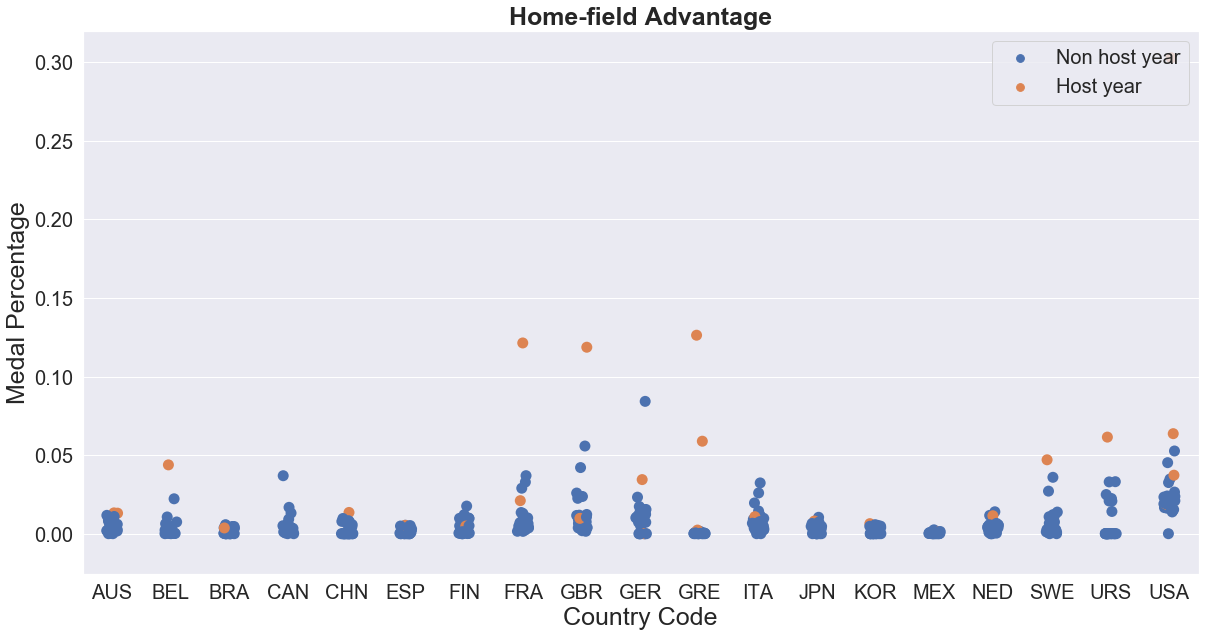

In [76]:
sns.set()
plt.rcParams.update({'font.size': 18})
HostCountries_list = ["GRE", "FRA", "USA", "GBR", "SWE", "BEL", "NED", "GER","FIN", "AUS", "ITA", "JPN", "MEX", "CAN", "URS", "KOR", "ESP", "CHN", "BRA"]
plt.figure(figsize=(20,10))
ax = sns.stripplot(x="NOC", y="Percentage_of_Medals",hue="Host_Country", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)], size=11)
plt.xlabel("Country Code", size=25)
plt.ylabel("Medal Percentage", size=25)
plt.xticks(size=20)
plt.yticks(size=20)
L = plt.legend(loc=1,prop={'size': 20})
L.get_texts()[0].set_text('Non host year')
L.get_texts()[1].set_text('Host year')
plt.title('Home-field Advantage', size=25, weight="bold")

<font size='3'>**We first tried scatter plot with jitter. The x-axis is the countries that have ever hosted the Olympics and y-axis denotes the percentage of a medals earned by a country against the total number of medals in that year. Blue dots represent data when the country were not the host and the orange ones for when it was the host. However, the blue dots were too packed.**</font>

Text(0.5, 1.0, 'Home-field Advantage')

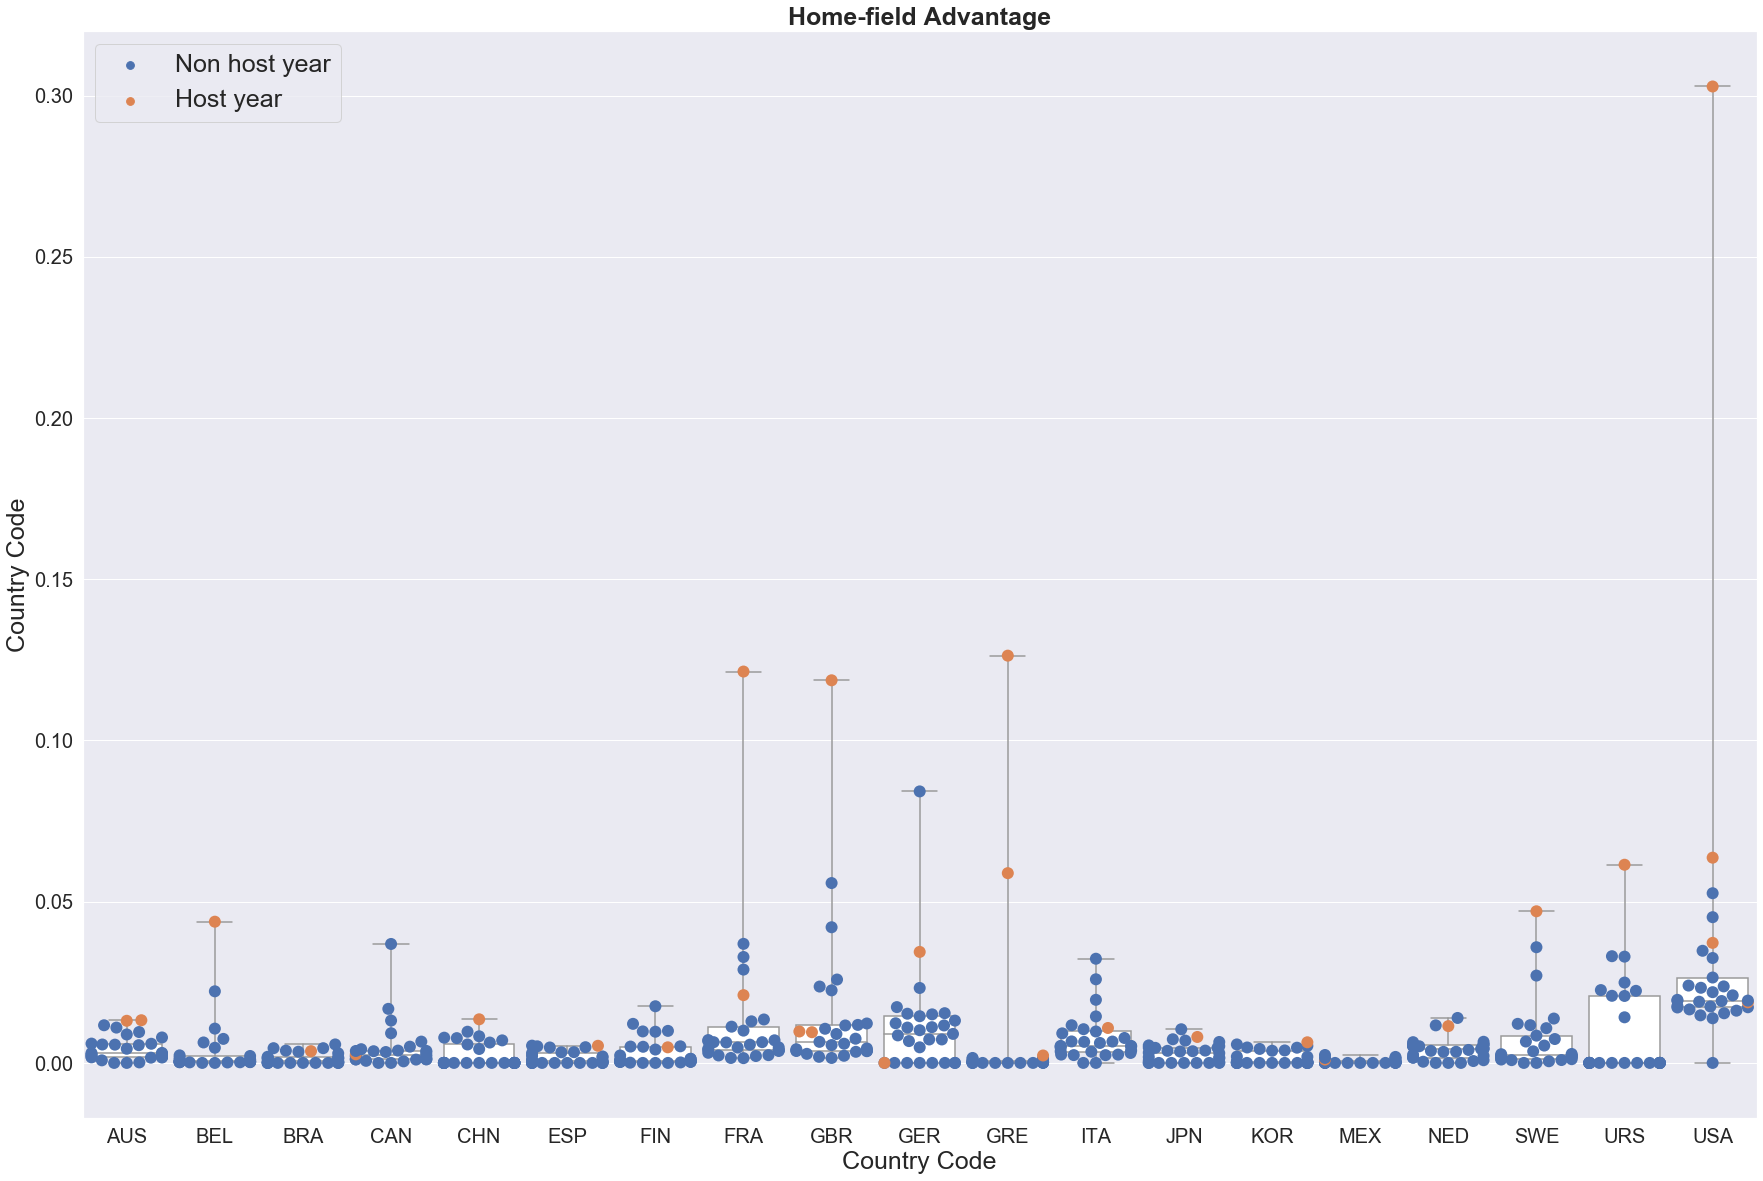

In [50]:
sns.set()
plt.figure(figsize=(30,20))
ax = sns.boxplot(x="NOC", y="Percentage_of_Medals", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)],whis=np.inf, color="white")
ax = sns.swarmplot(x="NOC", y="Percentage_of_Medals",hue="Host_Country", data=MedalSummary[MedalSummary.NOC.isin(HostCountries_list)], size=12)
plt.xlabel("Country Code", size=25)
plt.ylabel("Country Code", size=25)
plt.xticks(size=20)
plt.yticks(size=20)
L = plt.legend(loc=2,prop={'size': 25})
L.get_texts()[0].set_text('Non host year')
L.get_texts()[1].set_text('Host year')
plt.title('Home-field Advantage', size=25, weight="bold")

<font size='3'>**We later tried beeswarm plot coupled with box plot. Dots were shown much more clearly but one drawback is that we could not see the density distribution of all the dots very well. Density distribution was important in this case because it would allow an easier comparison between the medal percentage when a country was a host and that when it was not.**</font>

Text(0.5, 0.98, 'Home-Field Advantage')

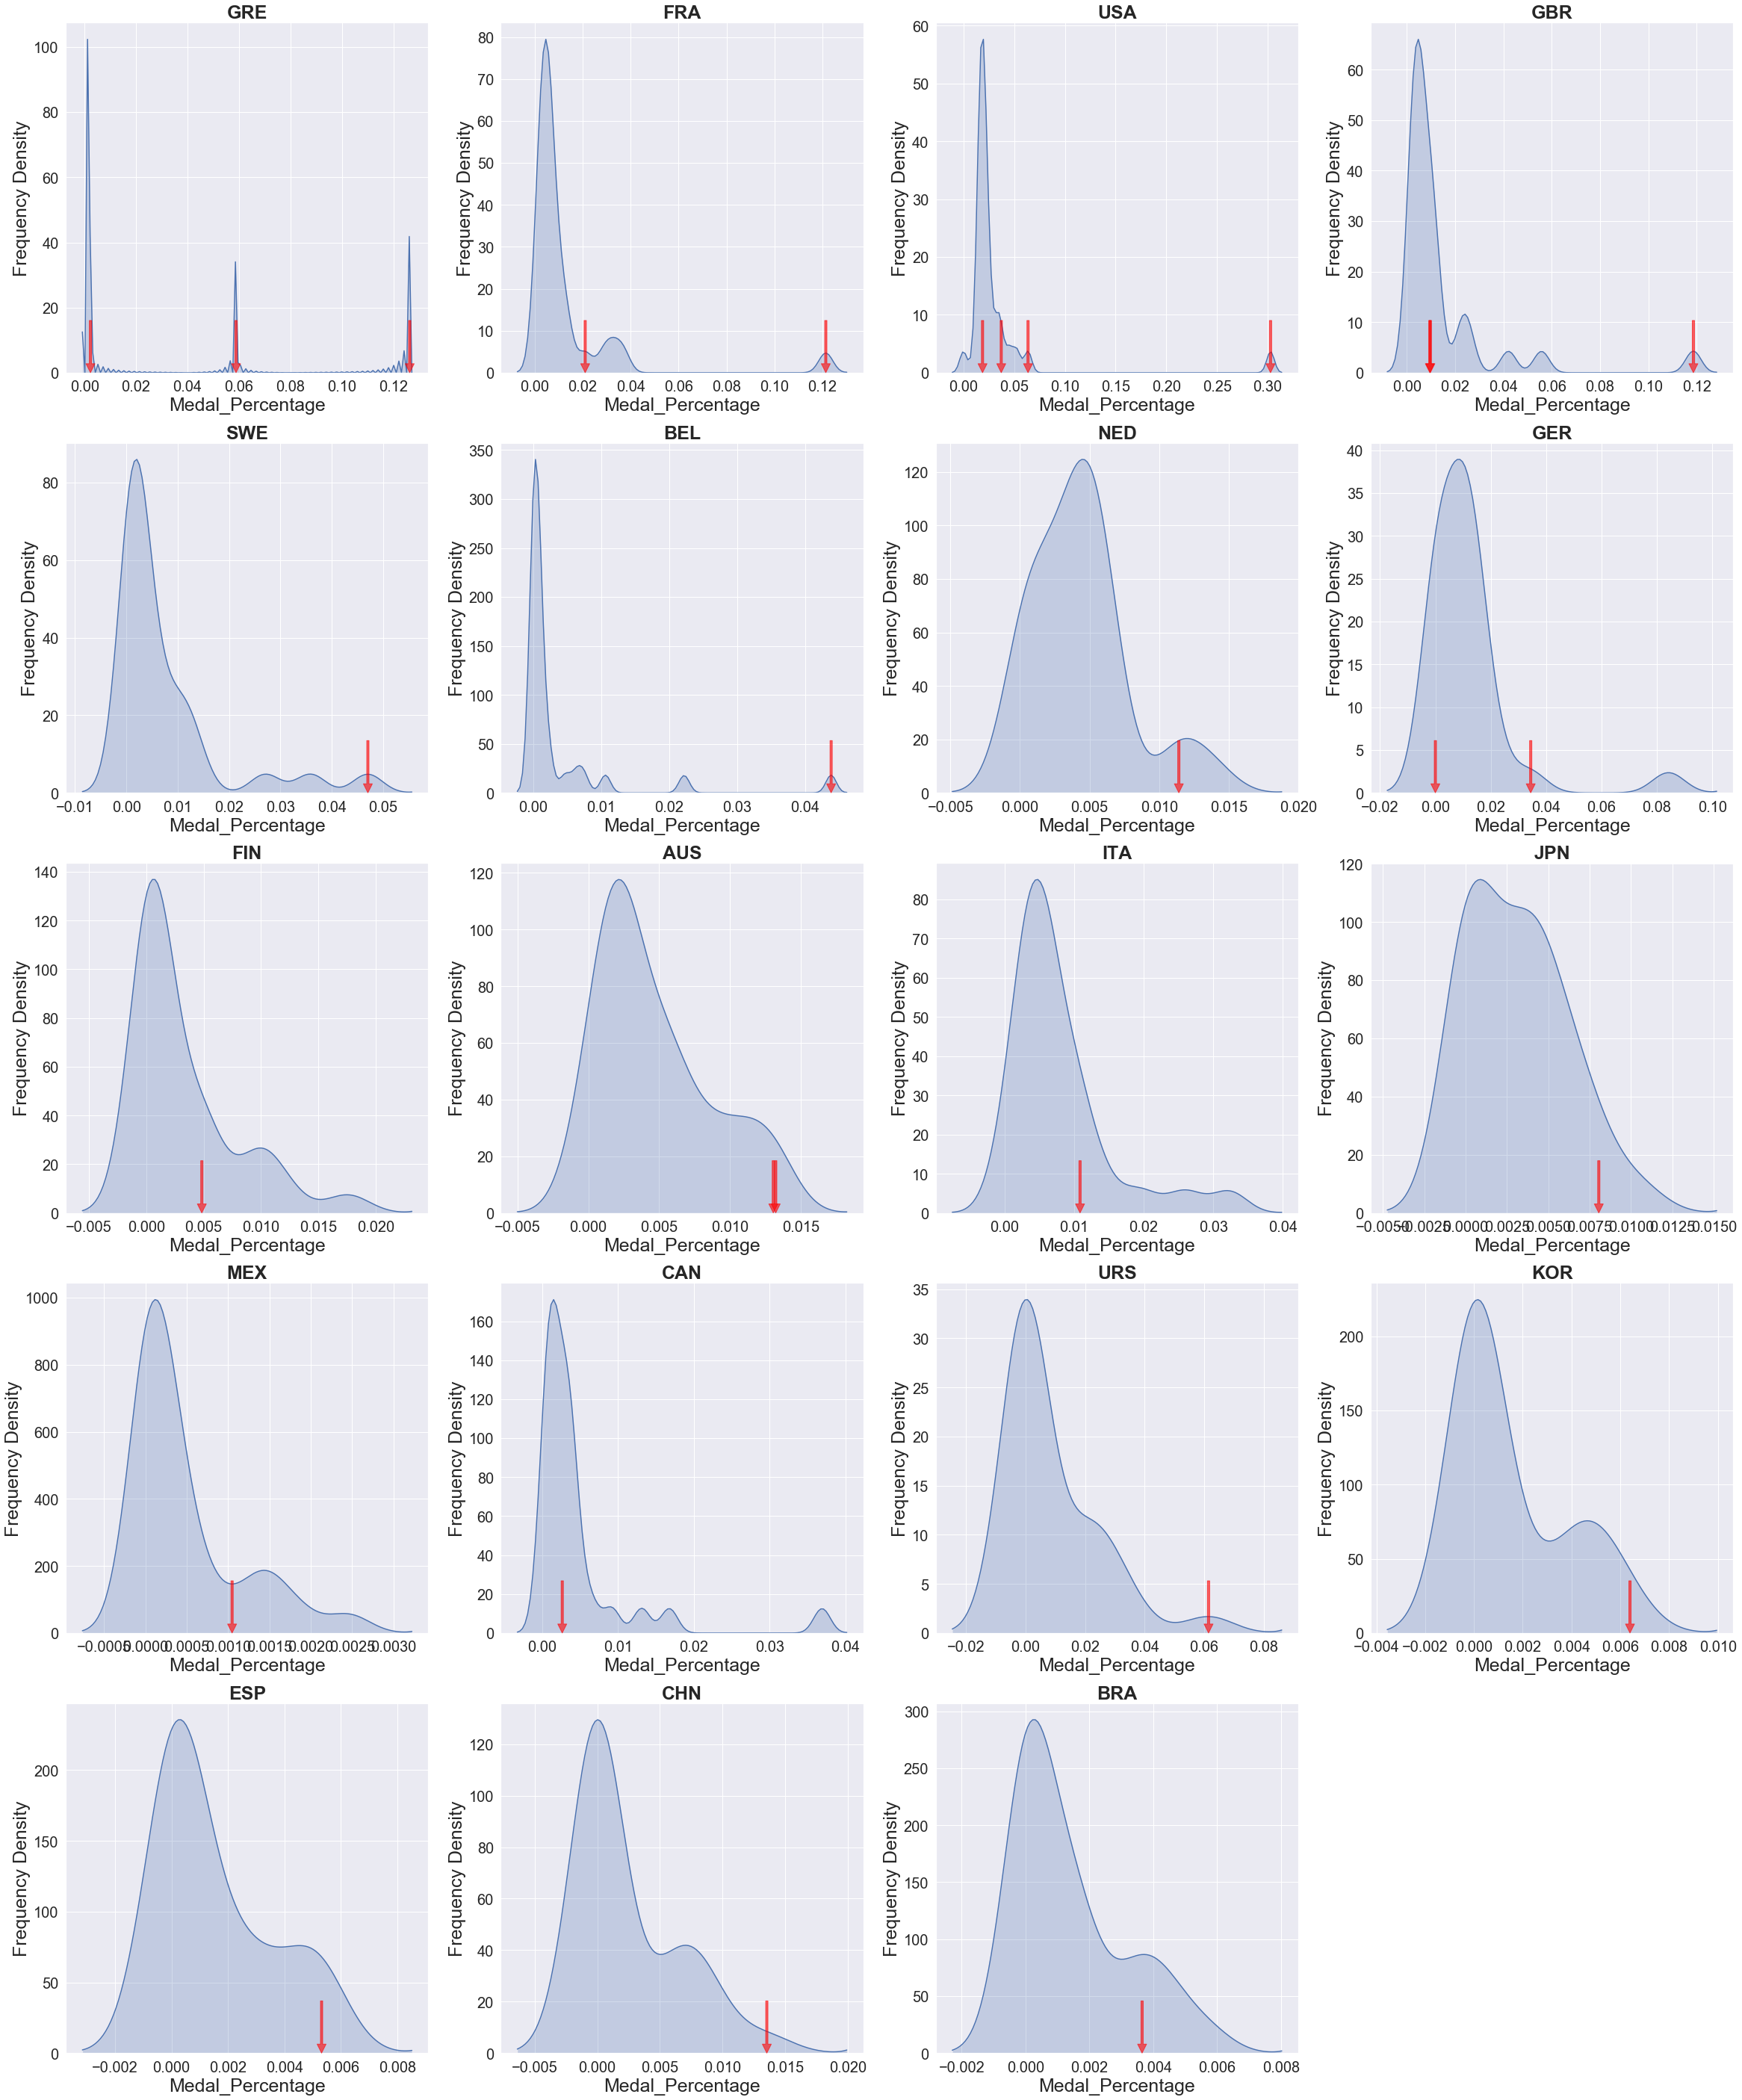

<Figure size 432x288 with 0 Axes>

In [75]:
HostCountries_list=["GRE", "FRA", "USA", "GBR", "SWE", "BEL", "NED", "GER","FIN", "AUS", "ITA", "JPN", "MEX", "CAN", "URS", "KOR", "ESP", "CHN", "BRA"]
plt.figure(figsize=(40,50))
for i,c in enumerate(HostCountries_list,1):
    plt.subplot(5, 4, i)
    sns.kdeplot(MedalSummary[MedalSummary.NOC == c]["Percentage_of_Medals"],shade=True,legend=False)
    plt.title(c, size=25,weight="bold")
    plt.ylabel("Frequency Density", size=25)
    plt.xlabel("Medal_Percentage", size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    for h in MedalSummary[(MedalSummary.Host_Country == 1) & (MedalSummary.NOC == c)]["Percentage_of_Medals"]:
        plt.annotate('',xy=(h, 0),xytext=(0.030, 70),textcoords='offset pixels',
                horizontalalignment='center',
                verticalalignment='bottom',arrowprops=dict(shrink=0.001, width=3,color="red",alpha=0.6))

fig = plt.figure()
fig.suptitle("Home-Field Advantage", fontsize = 30)


<font size='3'>**To show density distribution of medal percentages, we used kernel density estimation in a small multiple. The x-axis is the medal percentage and the y-axis is the probability density. We used a red arrow to denote when the country was a Olympics host. An arrow located at the tail would indicate the existence of home-field advantage.**</font>

<font size='3' color="darkred">*KEY FINDING: A country is more likely to have a higher degree of medal share when it host the Olympics. In other words, home-field advantage does seem to exist in the Olympics.*</font>

----------------------------------------------------------------------------------------------------------------------

## Topic 3.1: Medal Efficiency
Medal efficiency is higher when fewer Olympics participants have gained more medals for the country. It shows how efficient of participants can contribute to earned medals for a country.

Golds were given 4 points, Silver 2, and Bronze 1. Attendance without any medals was assigned to 0 point. A country’s “medal efficiency” was calculated as the quotient of total medal points and the total number of athletes participating over 120 years.

### <font color="darkred">*Main goal: Visualize and evaluate medal efficiency by looking at each country's Olympics participants and earned medals*</font>

In [52]:
continent_4=pd.read_excel('continent_4.xlsx')
continent_4.rename(columns={'A-3':'code_3'},inplace=True)
continent_4_sp=continent_4[['249 countries','code_3','IOC']]
continent_4_sp.columns =['CountryName','ISO','NOC']
continent_4_sp.head()

,CountryName,ISO,NOC
0,Afghanistan,AFG,AFG
1,Åland,ALA,NaN
2,Albania,ALB,ALB
3,Algeria,DZA,ALG
4,American Samoa,ASM,ASA


In [53]:
noc_tab=pd.read_csv('noc_tab.csv')
noc_tab.columns=['NOC','0','1','MedalRate']
noc_tab.head()

,NOC,0,1,MedalRate
0,AFG,124,2,0.015873
1,AHO,73,1,0.013514
2,ALB,63,0,0.000000
3,ALG,522,17,0.031540
4,AND,53,0,0.000000


In [54]:
medalrate_merged=noc_tab.merge(continent_4_sp, on='NOC', how='left')
medalrate_merged.sample(20)

,NOC,0,1,MedalRate,CountryName,ISO
41,CHN,3414,909,0.210271,China,CHN
47,COM,19,0,0.000000,Comoros,COM
60,EGY,1592,27,0.016677,Egypt,EGY
147,NFL,1,0,0.000000,NaN,NaN
11,ASA,35,0,0.000000,American Samoa,ASM
171,RUS,2678,905,0.252582,Russian Federation,RUS
54,CZE,883,71,0.074423,Czech Republic,CZE
50,CRO,569,138,0.195191,Croatia,HRV
124,MAL,45,0,0.000000,NaN,NaN
159,PLE,21,0,0.000000,Palestine,PSE


In [55]:
medal_try_tab=pd.read_csv('medal_try_table.csv')
medal_try_tab.columns=['NOC','0','1','2','4','MedalRate']
medal_try_tab.MedalRate=medal_try_tab.MedalRate.round(2)
medal_try_tab.head()

,NOC,0,1,2,4,MedalRate
0,AFG,124,2,0,0,0.02
1,AHO,73,0,1,0,0.03
2,ALB,63,0,0,0,0.00
3,ALG,522,8,4,5,0.07
4,AND,53,0,0,0,0.00


In [56]:
medalrate_merged2=medal_try_tab.merge(continent_4_sp, on='NOC', how='left')
medalrate_merged2.sample(2)

,NOC,0,1,2,4,MedalRate,CountryName,ISO
222,VNM,62,0,0,0,0.00,NaN,NaN
181,SLO,477,15,9,6,0.11,Slovenia,SVN


In [57]:
trace = go.Choropleth(
            locations = medalrate_merged2['ISO'],
            locationmode='ISO-3',
            z = medalrate_merged2['MedalRate'],
            text = medalrate_merged2['CountryName'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'viridis',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Medal Efficiency',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Medal efficiency of Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'orthographic'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

----------------------------------------------------------------------------------------------------------------------


<font size='3'>**We plotted a choropleth map using orthographic projection.**</font>

<font size='3' color="darkred">*KEY FINDING: Among today’s countries and regions, the United States of America has the highest medal efficiency, 0.91. This means that on average, every American athlete almost earned a Bronze medal in the past Olympic Games. Medal efficiency for Russia, China, Pakistan, India, Germany, and Australia is also very high. We also found that medal efficiency had a high correlation with countries economic development.*</font>

## Topic 4.1: Ranking Sports by Number of Athletes
### <font color="darkred">*Main goal: Visualize which sports have the most participants*</font>

In [61]:
from wordcloud import WordCloud
from collections import Counter

In [62]:
sports_list=[]
summer_data=summer.reset_index()
for i in range(len(summer_data)): 
    sports_list.append(summer_data.loc[i, "Sport"])
sports=" ".join(sports_list)
sports_no = dict(Counter(sports_list))

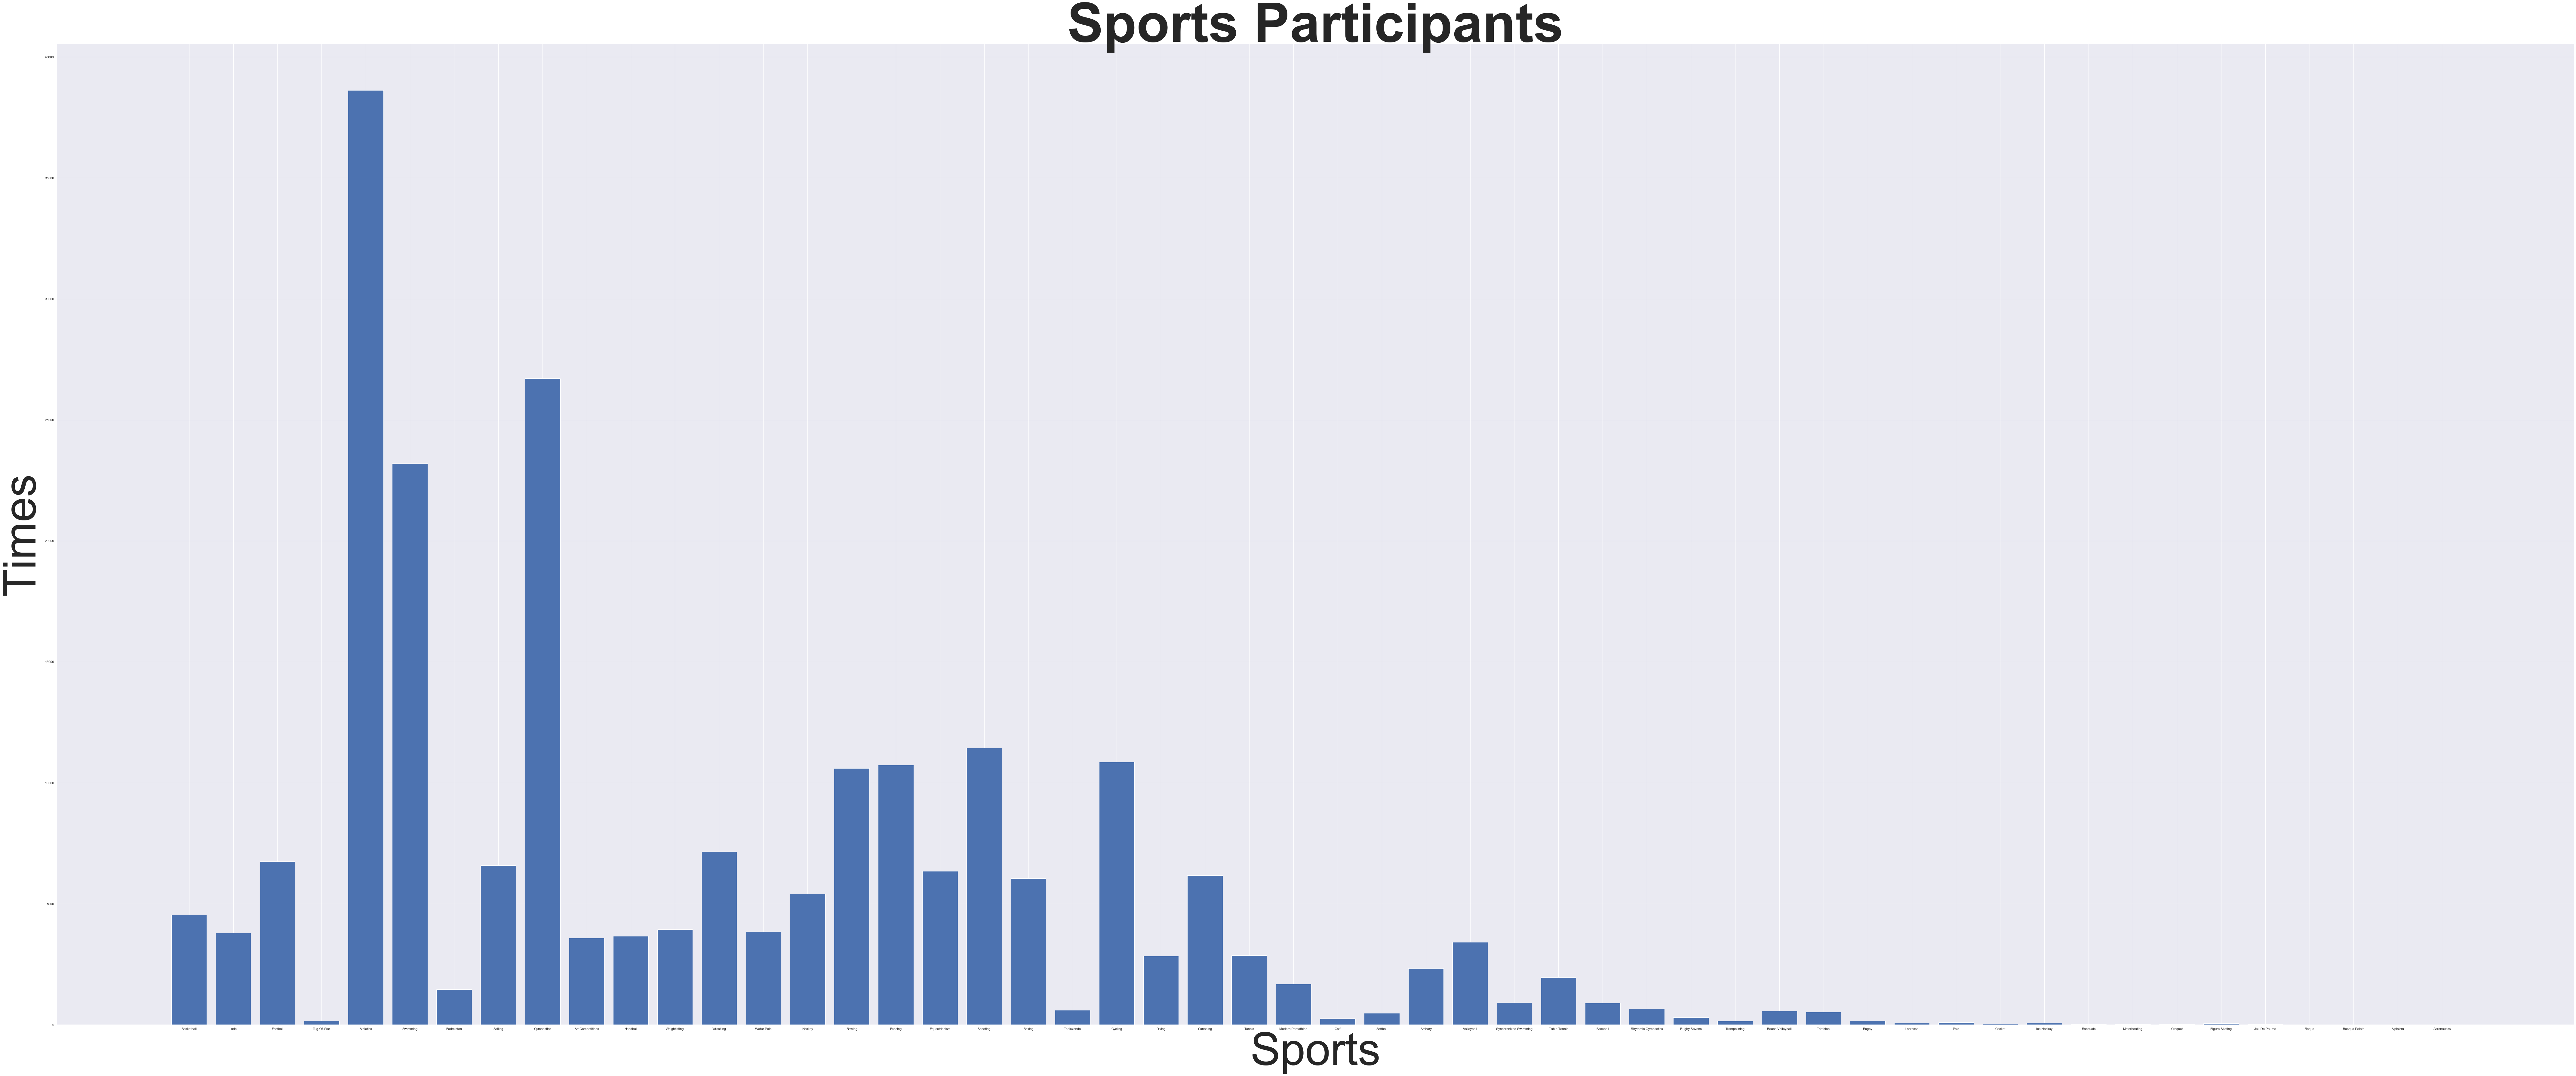

In [63]:
plt.figure(figsize=(150,60))
plt.xlabel('Sports', size = 150)
plt.ylabel('Times', size = 150)
plt.bar(range(len(sports_no)), list(sports_no.values()), align='center')
plt.xticks(range(len(sports_no)), list(sports_no.keys()))
plt.title('Sports Participants', size=180, weight="bold")
plt.show()

<font size='3'>**To rank sports according to the number of athletes, we first plotted a bar chart, each bar representing a category. As can be seen below, since there were too many categories, the names of sports were too small in order to accomodate all of them in x-axis. Since there are around thirty sports, using colors is also not an ideal option.**</font>

Text(0.5, 1.0, 'Ranking Sports by Number of Athletes')

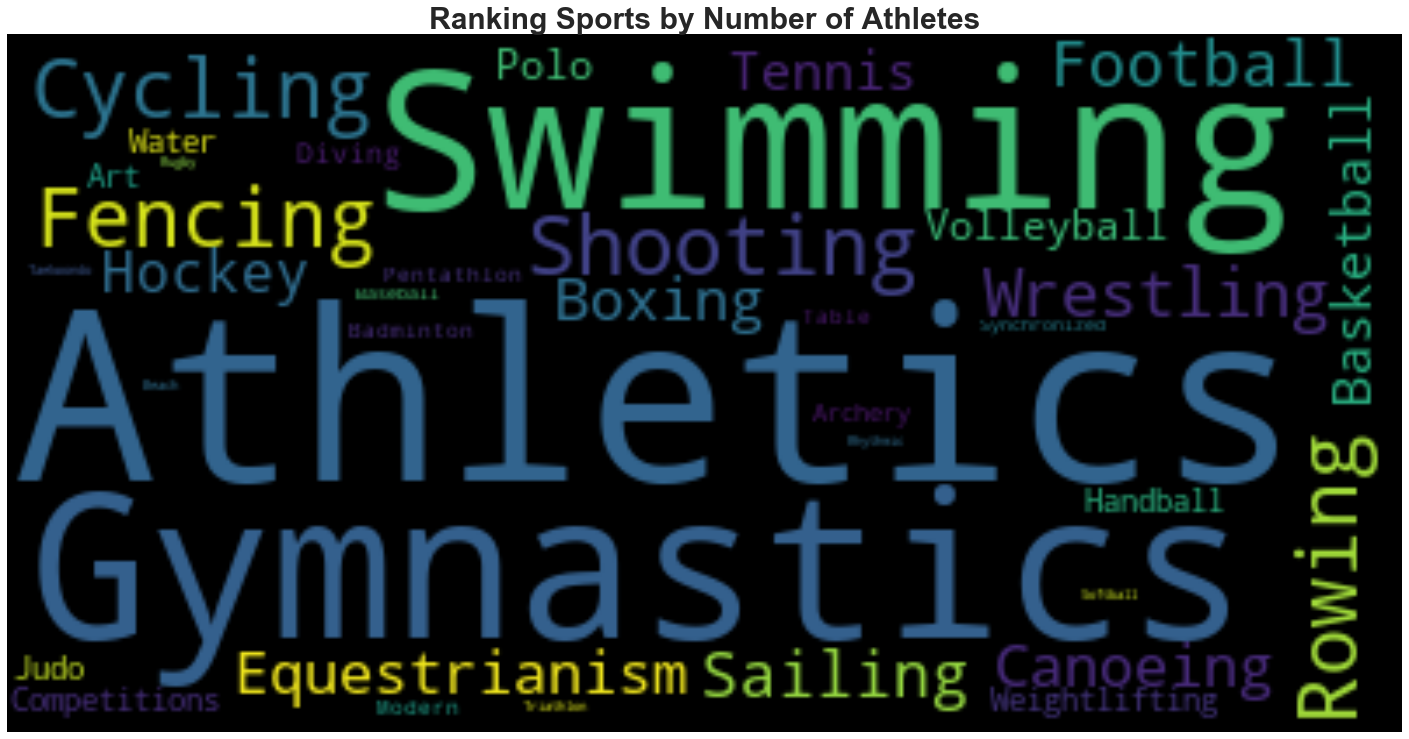

In [71]:
cloud = WordCloud(collocations=False).generate(sports)
#All participants
plt.figure(figsize=(25,30))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ranking Sports by Number of Athletes", size=30, weight="bold")

<font size='3'>**We then thought about word cloud. In word cloud, the size of words is associated with the frequencies. This would make our ranking clearer.**</font>

<font size='3' color="darkred">*KEY FINDING: Athletics, gymnastics, swimming, shooting and football are among the sports with the highest number of participating athletes. This might be because these sports have greater shares of total medals. It might also because there are many sub-categories within them.*</font>